In [1]:
# Cargamos los datos
load("ba_dataframe.Rdata", verbose = TRUE)

Loading objects:
  df
  coords


In [2]:
# Localizamos los NAs
naind <- which(is.na(df), arr.ind = TRUE)
length(naind)

[1] 221352

In [3]:
# Librerías a usar
library("mclust")
require(sp)
require(magrittr)

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"

In [41]:
str(df)

'data.frame':	16200 obs. of  12 variables:
 $ Dec: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Jan: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Feb: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Mar: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Apr: num  0 0 0 0 0 0 0 NA NA NA ...
 $ May: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Jun: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Jul: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Aug: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Sep: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Oct: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Nov: num  0 0 0 0 0 0 0 NA NA NA ...


In [39]:
summary(df)

      Dec             Jan             Feb             Mar       
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :0.001   Mean   :0.001   Mean   :0.001   Mean   :0.001  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :0.198   Max.   :0.168   Max.   :0.512   Max.   :0.182  
 NA's   :9223    NA's   :9223    NA's   :9223    NA's   :9223   
      Apr             May             Jun             Jul       
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :0.001   Mean   :0.001   Mean   :0.001   Mean   :0.001  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :0.072   Max.   :0.117   Max.   :0.196   Max.   :0.306  
 NA's   :9223    NA's   :

## K-means

In [10]:
# Primer agrupamiento: usando K-Means
?kmeans

In [11]:
# Búsqueda del k óptimo

#' @title Best k-means model selection
#' @description Creates one k-means model for each value of k between 1 and K and plot their between clusters sum of squares and
#               their within cluster sum of squares
#' @param data Data frame
#' @param K number of groups
#' @param n.inits Number of initializations. Default to 10
#' @param itermax Maximun number of iterations. Default to 10
#' @return A list of k-means models, one for each value between 1 and K

selectBestkMeans <- function(data, K, itermax = 10, n.inits = 10) {
    km.list = list()
    km.b = c()
    km.tw = c()
    for (i in 1:K){
        km.list[[i]] = kmeans(x = data, centers = i, iter.max = itermax, nstart = n.inits)
        km.b[i] = km.list[[i]]$betweenss
        km.tw[i] = km.list[[i]]$tot.withinss
    }
    par(mfrow = c(2,2))
    plot(km.b, col = "blue", type = "b", xlab = "k", ylab = "ss", main = "ss between clusters")
    plot(km.tw, col = "red", type = "b", xlab = "k", ylab = "ss", main = "ss within clusters")
    return(km.list)
}

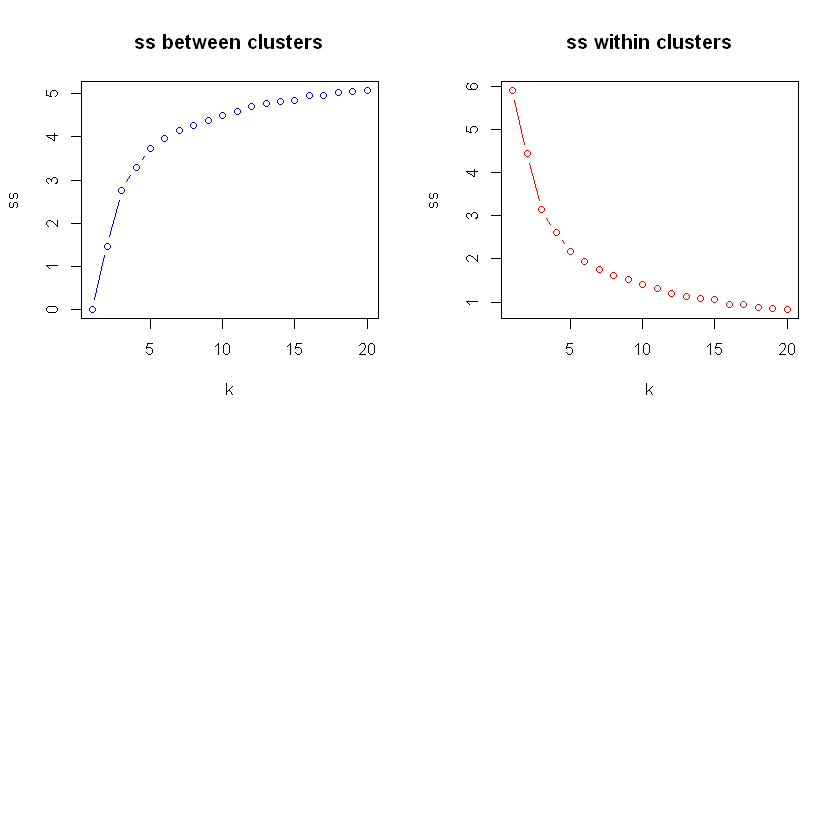

In [12]:
# Prueba con k = 1:20
set.seed(1)
km.15 <- selectBestkMeans(data = df[-naind, ], K = 20, itermax = 20, n.inits = 50)
# Lo más adecuado parece coger k = 7 mirando la gráfica de la izquierda

In [13]:
# Función para pintar los clusters
plotClust.kmeans <- function(df, coords, clus, ...) {
    arg.list <- list(...)
    # arg.list <- list()
    v <- numeric(nrow(df))
    v[naind] <- NA
    v[-naind] <- clus$cluster
    df1 <- cbind.data.frame(coords, v)
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    arg.list[["zcol"]] <- 1
    do.call("spplot", arg.list) %>% print()
    # spplot(df1, zcol = 1, at = seq(0,7,1))
    return(df1@data)
}

In [14]:
# Para los colores
require(RColorBrewer)
#display.brewer.all()
group.colors <- colorRampPalette(c(brewer.pal(8, "Dark2"), brewer.pal(8, "Accent")))

Loading required package: RColorBrewer


[1]   12   62   42  128    9 6717

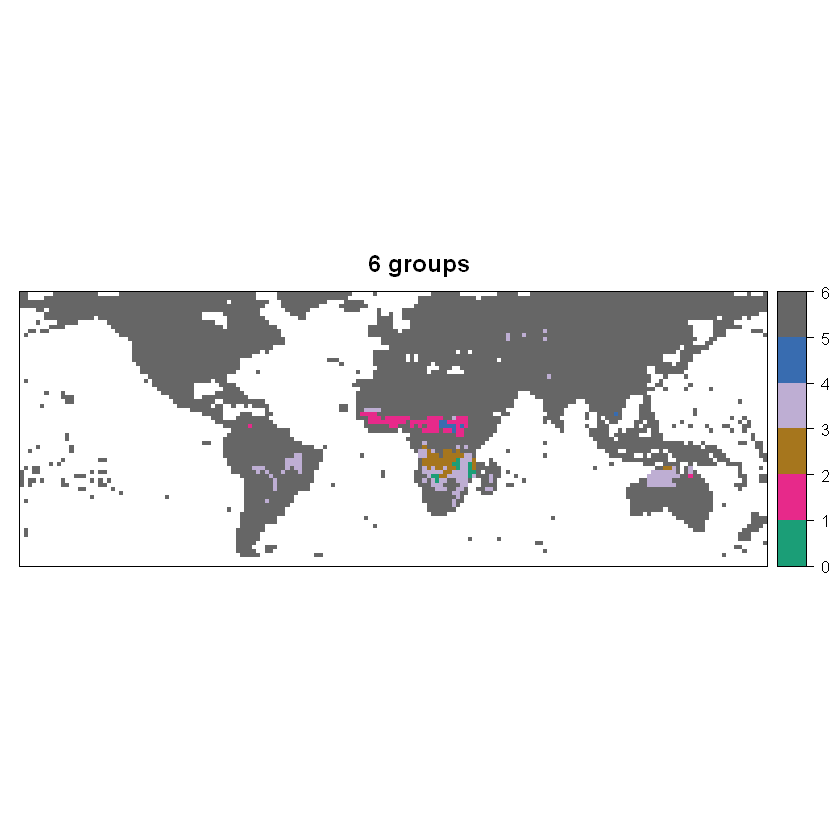

In [15]:
# 6 clusters
km.15[[6]]$size
km.df.6 <- plotClust.kmeans(df, coords, km.15[[6]], col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "6 groups")

[1] 6712   46   36   11    9  102   54

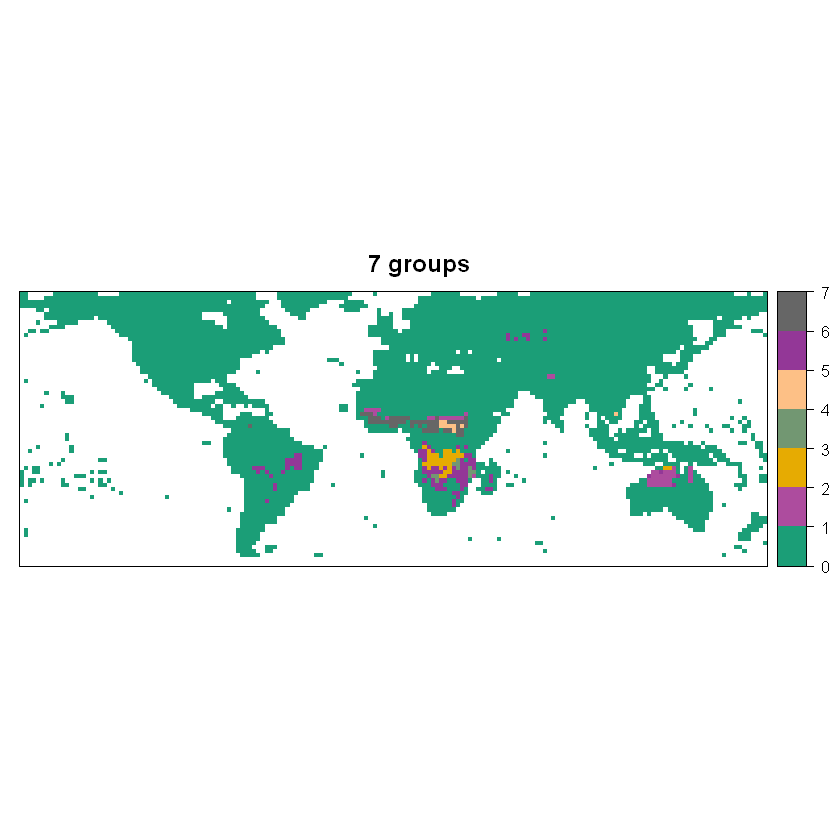

In [16]:
# 7 clusters
km.15[[7]]$size
km.df.7 <- plotClust.kmeans(df, coords, km.15[[7]], col.regions = group.colors(7),
                      at = seq(0, 7, 1), ylim = c(-60, 72), main = "7 groups")

A simple vista no veo grandes diferencias

## Gaussian Mixtures

In [46]:
# Segundo agrupamiento: usando gaussian mixtures
?Mclust

In [20]:
#' @title Best GMM model selection
#' @description Retain the lowest BIC model after an arbitary number of GMM initializations
#' @param data Data frame
#' @param K number of groups
#' @param n.inits Number of initializations. Default to 10
#' @return A mclust-class model
#' @importFrom mclust Mclust

selectBestGMM <- function(data, K, n.inits = 10) {
    i <- 1
    gmm.list <- rep(list(bquote(), n.inits))
    while (i <= n.inits) {
        gmm.list[[i]] <- Mclust(data, G = 1:K)  
        i <- i + 1
    } 
    bics <- numeric(length(gmm.list))
    for (i in 1:length(gmm.list)) {
        bics[i] <- gmm.list[[i]]$bic
    }
    gmm <- gmm.list[[which.min(bics)]]
    message("Lowest BIC: ", round(min(bics), 2))
    message("Number of clusters:", gmm$G)
    return(gmm)
}

In [21]:
gmm7 <- selectBestGMM(data = df[-naind, ], K = 7)

Lowest BIC: 816713.17
Number of clusters:4


In [22]:
plotClust.gmm <- function(df, coords, clus, ...) {
    arg.list <- list(...)
    # arg.list <- list()
    v <- numeric(nrow(df))
    v[naind] <- NA
    v[-naind] <- clus$classification
    df1 <- cbind.data.frame(coords, v)
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    arg.list[["zcol"]] <- 1
    do.call("spplot", arg.list) %>% print()
    # spplot(df1, zcol = 1, at = seq(0,7,1))
    return(df1@data)
}

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood    n  df      BIC      ICL
       409803.5 6970 327 816713.2 809040.1

Clustering table:
   1    2    3    4 
 592  388 5868  122 

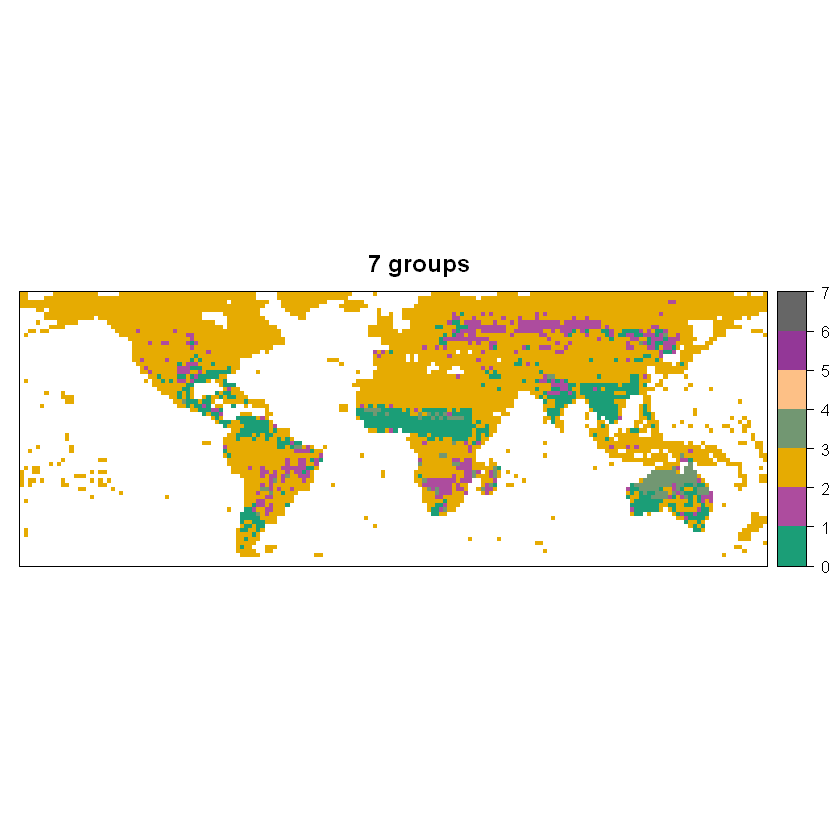

In [23]:
summary(gmm7)
gmm.df.7 <- plotClust.gmm(df, coords, gmm7, col.regions = group.colors(7),
                      at = seq(0, 7, 1), ylim = c(-60, 72), main = "7 groups")

In [24]:
gmm7 <- selectBestGMM(data = df[-naind, ], K = 7)
gmm8 <- selectBestGMM(data = df[-naind, ], K = 8)
gmm9 <- selectBestGMM(data = df[-naind, ], K = 9)
gmm10 <- selectBestGMM(data = df[-naind, ], K = 10)
gmm11 <- selectBestGMM(data = df[-naind, ], K = 11)
# gmm12 <- selectBestGMM(data = df[-naind, ], K = 12)
# gmm13 <- selectBestGMM(data = df[-naind, ], K = 13)
# gmm14 <- selectBestGMM(data = df[-naind, ], K = 14)


Lowest BIC: 836209.17
Number of clusters:4
Lowest BIC: 839496.06
Number of clusters:6
Lowest BIC: 838851.26
Number of clusters:6
Lowest BIC: 850932.98
Number of clusters:8
Lowest BIC: 832480.1
Number of clusters:6


In [25]:
summary(gmm7)
summary(gmm8)
summary(gmm9)
summary(gmm10)
summary(gmm11)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 4 components: 

 log-likelihood    n  df      BIC      ICL
       419697.5 6970 360 836209.2 830910.1

Clustering table:
   1    2    3    4 
 727 5829  195  219 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n  df      BIC      ICL
         421894 6970 485 839496.1 833127.4

Clustering table:
   1    2    3    4    5    6 
 603   49  115  243 5921   39 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n  df      BIC      ICL
       421571.6 6970 485 838851.3 833696.1

Clustering table:
   1    2    3    4    5    6 
 361 5933  255  175   36  210 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 8 components: 

 log-likelihood    n  df    BIC      ICL
       428311.6 6970 643 850933 843265.9

Clustering table:
   1    2    3    4    5    6    7    8 
 412 5825   76  180   31  266   94   86 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n  df      BIC      ICL
         418386 6970 485 832480.1 825744.3

Clustering table:
   1    2    3    4    5    6 
5900  507  308  147   10   98 

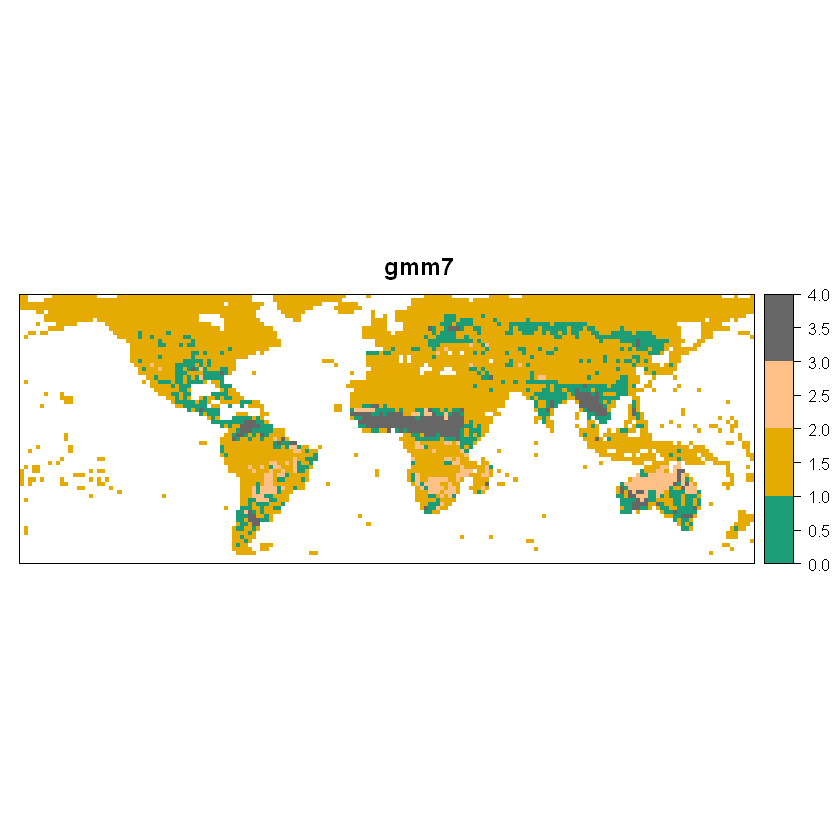

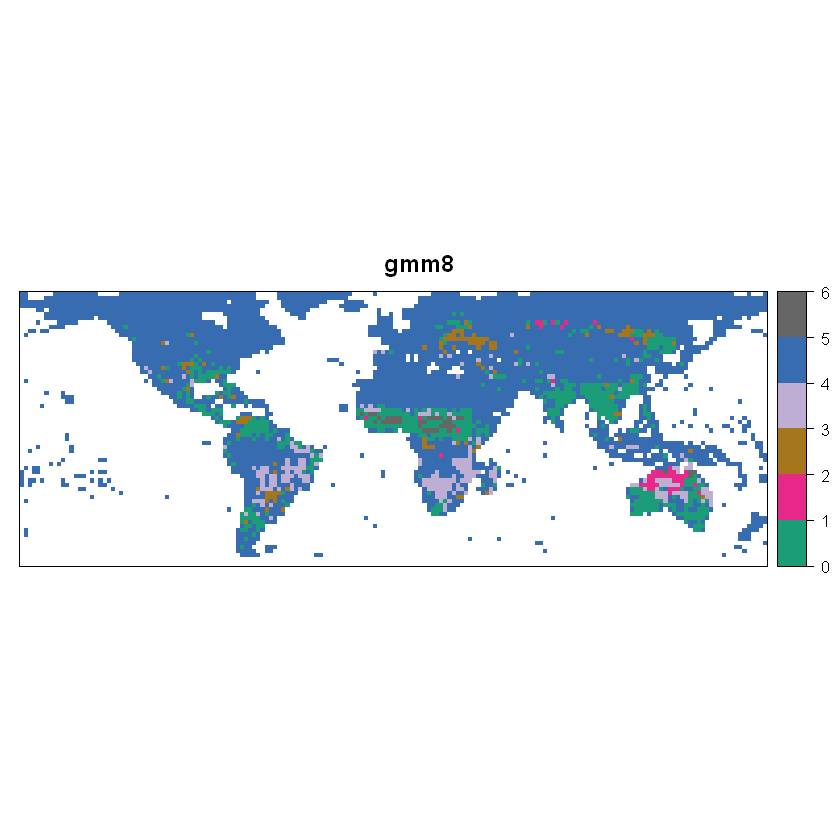

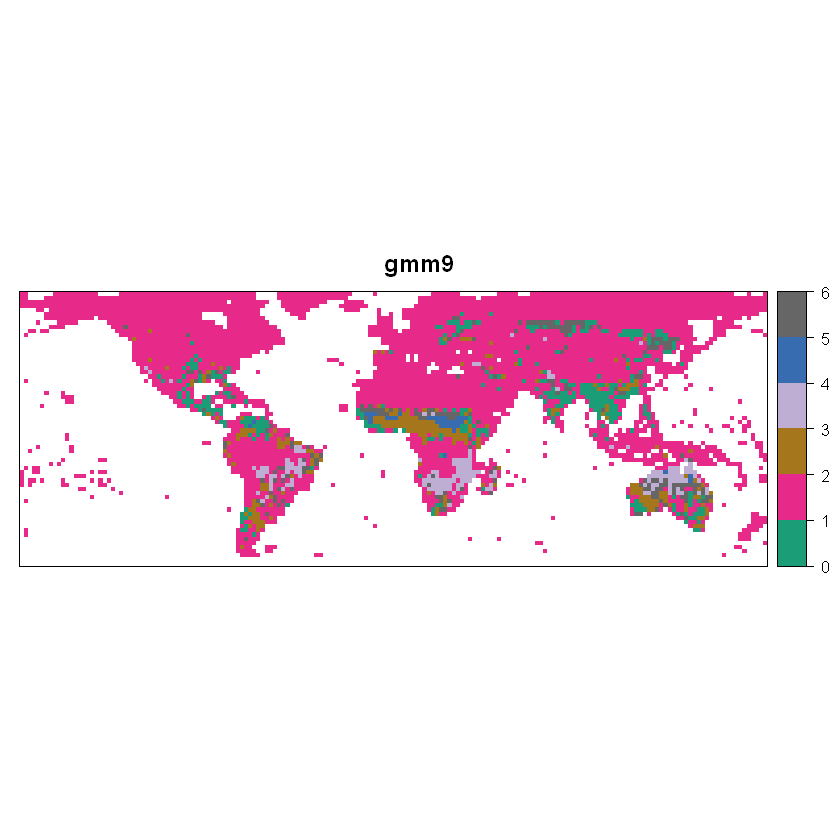

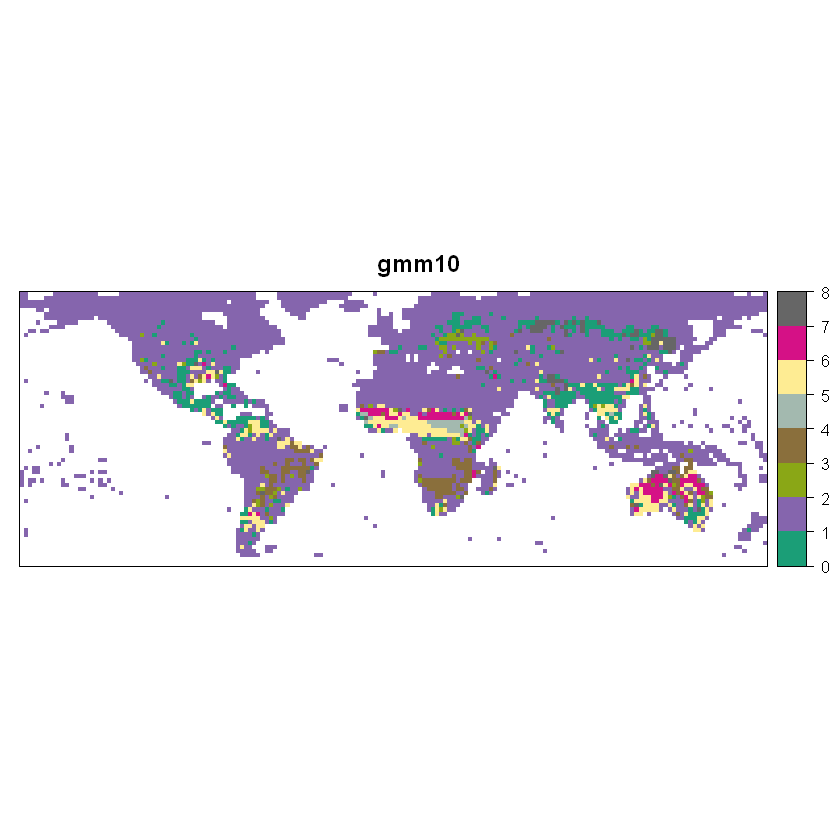

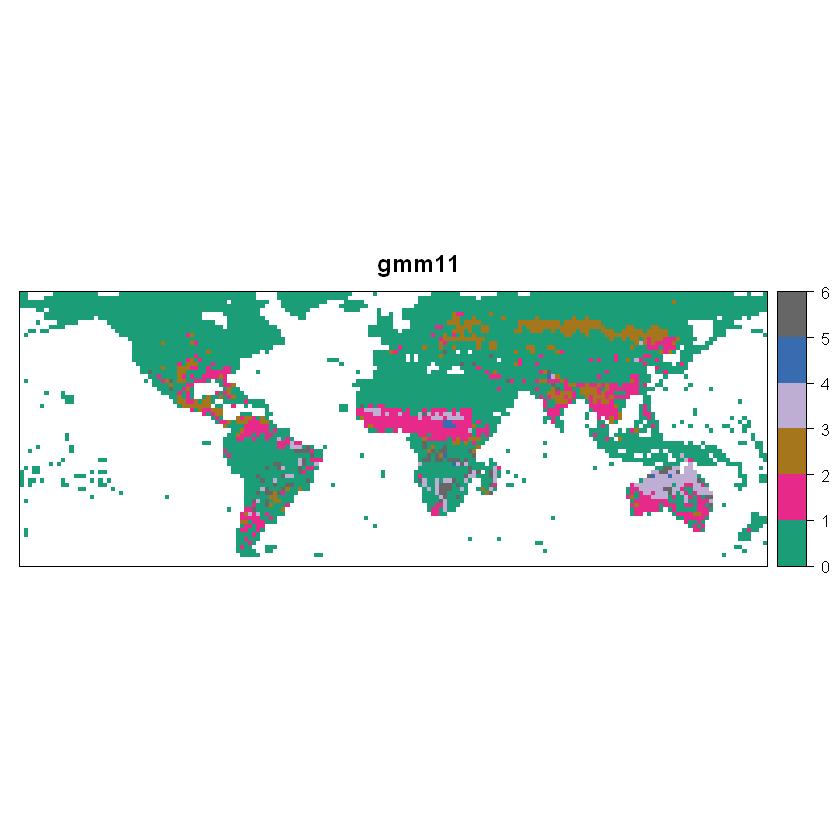

In [50]:
gmm.df.7 <- plotClust.gmm(df, coords, gmm7, col.regions = group.colors(4),
                      at = seq(0, 4, 1), ylim = c(-60, 72), main = "gmm7")
gmm.df.8 <- plotClust.gmm(df, coords, gmm8, col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "gmm8")
gmm.df.9 <- plotClust.gmm(df, coords, gmm9, col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "gmm9")
gmm.df.10 <- plotClust.gmm(df, coords, gmm10, col.regions = group.colors(8),
                      at = seq(0, 8, 1), ylim = c(-60, 72), main = "gmm10")
gmm.df.11 <- plotClust.gmm(df, coords, gmm11, col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "gmm11")

In [45]:
gmm7

'Mclust' model object: (EVV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

In [45]:
install.packages("")

package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Marcos\AppData\Local\Temp\Rtmp23ayzM\downloaded_packages
